In [1]:
import pandas as pd


In [2]:
df = pd.read_excel("Online_Retail.xlsx", sheet_name=0)
df.head()


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [3]:
df.shape


(525461, 8)

In [4]:
df.columns


Index(['Invoice', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'Price', 'Customer ID', 'Country'],
      dtype='object')

In [5]:
df.head()


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [6]:
df = df.dropna(subset=["Customer ID"])
df = df[df["Quantity"] > 0]
df["Description"] = df["Description"].astype(str).str.strip()
df["Invoice"] = df["Invoice"].astype(str)

In [7]:
df.groupby("Invoice")["StockCode"].nunique().sort_values(ascending=False).head()


Invoice
507235    250
500356    250
526089    240
525928    221
511051    220
Name: StockCode, dtype: int64

In [8]:
df["Description"] = df["Description"].str.strip()


In [9]:
basket = (
    df.groupby(["Invoice", "Description"])["Quantity"]
      .sum()
      .unstack()
      .fillna(0)
)


In [10]:
basket = (basket > 0).astype(bool)


In [11]:
pip install mlxtend


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [16]:
# En çok satılan 300 ürünü al
top_products = df["Description"].value_counts().head(300).index

# Sadece bu ürünleri içeren alt veri seti
df_small = df[df["Description"].isin(top_products)].copy()

# Sepet matrisi (Invoice x Description)
basket = (
    df_small.groupby(["Invoice", "Description"])["Quantity"]
    .sum()
    .unstack(fill_value=0)
)

# Binary dönüşüm (Apriori için ideal: bool)
basket = (basket > 0)

from mlxtend.frequent_patterns import apriori, association_rules

# Sık öğe kümeleri
frequent_items = apriori(
    basket,
    min_support=0.01,
    use_colnames=True
)

# Birliktelik kuralları
rules = association_rules(
    frequent_items,
    metric="confidence",
    min_threshold=0.3
)

# En yüksek confidence olan ilk 10 kuralı gör
rules.sort_values("confidence", ascending=False).head(10)

# Kuralları kaydet
rules.to_csv("rules.csv", index=False)

rules = rules.sort_values("confidence", ascending=False)
rules.head(10)



,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
473,"(WOOD S/3 CABINET ANT WHITE FINISH, WOOD 2 DRA...",(WOODEN FRAME ANTIQUE WHITE),0.012066,0.058533,0.011080,0.918269,15.687934,1.0,0.010374,11.519120,0.947692,0.186160,0.913188,0.553783
363,"(KITCHEN METAL SIGN, TOILET METAL SIGN)",(BATHROOM METAL SIGN),0.012414,0.038810,0.011080,0.892523,22.997485,1.0,0.010598,8.943250,0.968541,0.276012,0.888184,0.589012
385,"(KEY FOB , BACK DOOR, KEY FOB , GARAGE DESIGN)","(KEY FOB , SHED)",0.012646,0.023147,0.011196,0.885321,38.248534,1.0,0.010903,8.518162,0.986329,0.455189,0.882604,0.684515
468,"(WOOD S/3 CABINET ANT WHITE FINISH, WOODEN PIC...",(WOODEN FRAME ANTIQUE WHITE),0.015141,0.058533,0.012995,0.858238,14.662338,1.0,0.012108,6.641156,0.946123,0.214149,0.849424,0.540120
470,"(WOODEN FRAME ANTIQUE WHITE, WOOD S/3 CABINET ...",(WOODEN PICTURE FRAME WHITE FINISH),0.012995,0.047453,0.011080,0.852679,17.968794,1.0,0.010464,6.465772,0.956781,0.224442,0.845339,0.543087
471,"(WOODEN FRAME ANTIQUE WHITE, WOOD S/3 CABINET ...",(WOOD 2 DRAWER CABINET WHITE FINISH),0.012995,0.033705,0.011080,0.852679,25.298577,1.0,0.010642,6.559096,0.973117,0.311075,0.847540,0.590711
464,"(WOOD 2 DRAWER CABINET WHITE FINISH, WOODEN PI...",(WOODEN FRAME ANTIQUE WHITE),0.016127,0.058533,0.013459,0.834532,14.257353,1.0,0.012515,5.689732,0.945103,0.219905,0.824245,0.532231
472,"(WOODEN FRAME ANTIQUE WHITE, WOOD 2 DRAWER CAB...",(WOOD S/3 CABINET ANT WHITE FINISH),0.013459,0.038520,0.011080,0.823276,21.372936,1.0,0.010562,5.440572,0.966216,0.270922,0.816196,0.555463
306,(SET/10 BLUE SPOTTY PARTY CANDLES),(SET/10 PINK SPOTTY PARTY CANDLES),0.017751,0.021058,0.014503,0.816993,38.797062,1.0,0.014129,5.349218,0.991831,0.596659,0.813057,0.752849
23,(KITCHEN METAL SIGN),(BATHROOM METAL SIGN),0.019202,0.038810,0.015605,0.812689,20.940403,1.0,0.014860,5.131516,0.970888,0.367989,0.805126,0.607391


In [14]:
import os
os.getcwd()

'C:\\Users\\lenov\\OneDrive\\Masaüstü\\recommendation_project\\data'

In [15]:
# Her fatura için ürünleri listele (tekrarları istemezsen set kullan)
basket_list = (
    df.groupby('Invoice')['Description']
    .apply(lambda x: sorted(set(x)))   # tekrarları kaldırır
    .reset_index(name='Products')
)

# Daha okunaklı olsun diye ürün listesini tek metne çevir (ilk 10 ürün gibi kısalt)
basket_list['Products'] = basket_list['Products'].apply(lambda lst: ', '.join(lst[:10]) + (' ...' if len(lst) > 10 else ''))

basket_list.head(10)


,Invoice,Products
0,489434,"15CM CHRISTMAS GLASS BALL 20 LIGHTS, FANCY FON..."
1,489435,"CAT BOWL, DOG BOWL , CHASING BALL DESIGN, HEAR..."
2,489436,"AREA PATROLLED METAL SIGN, ASSORTED COLOUR BIR..."
3,489437,"BLUE PADDED SOFT MOBILE, CHOCOLATE HOT WATER B..."
4,489438,"CARROT CHARLIE+LOLA COASTER SET, CHARLIE & LOL..."
5,489439,"ASSORTED CAKES FRIDGE MAGNETS, ASSORTED COLOUR..."
6,489440,"CAT BOWL, DOG BOWL , CHASING BALL DESIGN"
7,489441,"BAKING SET 9 PIECE RETROSPOT, BIRD DECORATION ..."
8,489442,"BANQUET BIRTHDAY CARD, BINGO SET, BOTANICAL L..."
9,489443,"BATHROOM METAL SIGN, LADIES & GENTLEMEN METAL ..."


In [17]:
# Her fatura için sepetteki ürünleri göster (ilk 5 fatura)
basket_list = (
    df_small.groupby("Invoice")["Description"]
    .apply(lambda x: list(set(x)))
    .reset_index(name="Products")
)

basket_list.head()


,Invoice,Products
0,489434,"[PINK DOUGHNUT TRINKET POT, SAVE THE PLANET MU..."
1,489436,"[HOME BUILDING BLOCK WORD, ASSORTED COLOUR BIR..."
2,489437,"[HANGING HEART ZINC T-LIGHT HOLDER, VINTAGE SN..."
3,489438,"[GINGHAM HEART DOORSTOP RED, JUMBO BAG TOYS]"
4,489439,"[RED TOADSTOOL LED NIGHT LIGHT, POSTAGE, ASSOR..."


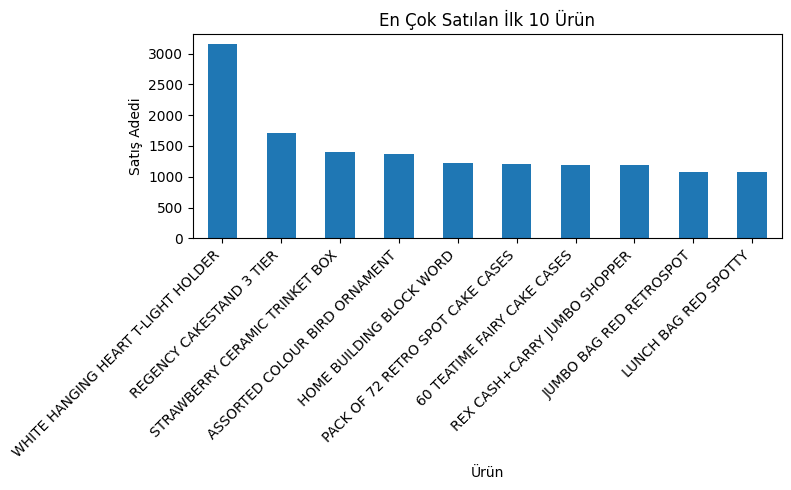

In [18]:
import matplotlib.pyplot as plt

top_10_products = (
    df["Description"]
    .value_counts()
    .head(10)
)

plt.figure(figsize=(8,5))
top_10_products.plot(kind="bar")
plt.title("En Çok Satılan İlk 10 Ürün")
plt.ylabel("Satış Adedi")
plt.xlabel("Ürün")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


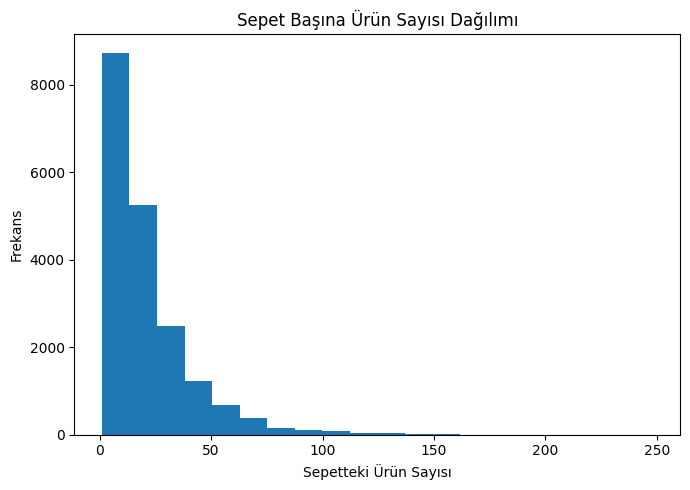

In [19]:
basket_size = (
    df.groupby("Invoice")["Description"]
    .nunique()
)

plt.figure(figsize=(7,5))
plt.hist(basket_size, bins=20)
plt.title("Sepet Başına Ürün Sayısı Dağılımı")
plt.xlabel("Sepetteki Ürün Sayısı")
plt.ylabel("Frekans")
plt.tight_layout()
plt.show()


In [20]:
from itertools import combinations
from collections import Counter

pairs = []

for invoice, group in df.groupby("Invoice"):
    items = list(set(group["Description"]))
    pairs.extend(combinations(items, 2))

pair_counts = Counter(pairs)

top_pairs = pair_counts.most_common(10)

top_pairs


[(('RED HANGING HEART T-LIGHT HOLDER', 'WHITE HANGING HEART T-LIGHT HOLDER'),
  722),
 (('SWEETHEART CERAMIC TRINKET BOX', 'STRAWBERRY CERAMIC TRINKET BOX'), 559),
 (('WOODEN FRAME ANTIQUE WHITE', 'WOODEN PICTURE FRAME WHITE FINISH'), 531),
 (('HOME BUILDING BLOCK WORD', 'LOVE BUILDING BLOCK WORD'), 522),
 (('HEART OF WICKER LARGE', 'HEART OF WICKER SMALL'), 491),
 (('WOODEN FRAME ANTIQUE WHITE', 'WHITE HANGING HEART T-LIGHT HOLDER'), 440),
 (('60 TEATIME FAIRY CAKE CASES', 'PACK OF 72 RETRO SPOT CAKE CASES'), 399),
 (('HOME BUILDING BLOCK WORD', 'WHITE HANGING HEART T-LIGHT HOLDER'), 391),
 (('ASSORTED COLOUR BIRD ORNAMENT', 'WHITE HANGING HEART T-LIGHT HOLDER'),
  390),
 (('PACK OF 60 PINK PAISLEY CAKE CASES', '60 TEATIME FAIRY CAKE CASES'), 388)]

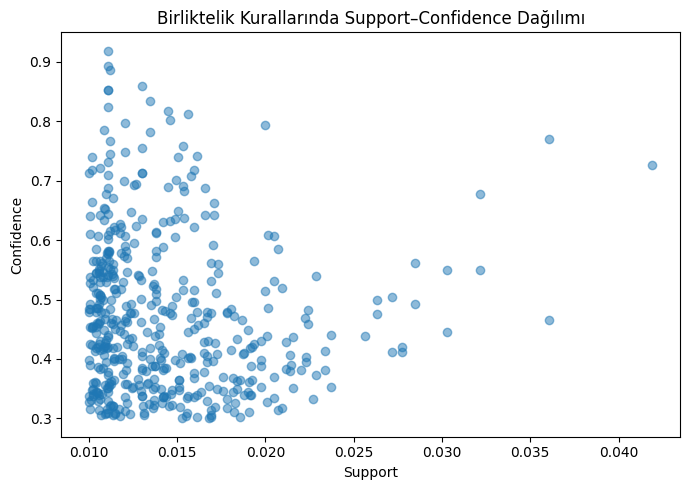

In [21]:
plt.figure(figsize=(7,5))
plt.scatter(rules["support"], rules["confidence"], alpha=0.5)
plt.xlabel("Support")
plt.ylabel("Confidence")
plt.title("Birliktelik Kurallarında Support–Confidence Dağılımı")
plt.tight_layout()
plt.show()


In [22]:
basket_preview = (
    df_small.groupby("Invoice")["Description"]
    .apply(lambda x: ', '.join(sorted(set(x))))
    .head(5)
)

basket_preview


Invoice
489434    PINK DOUGHNUT TRINKET POT, SAVE THE PLANET MUG...
489436    AREA PATROLLED METAL SIGN, ASSORTED COLOUR BIR...
489437    CHOCOLATE HOT WATER BOTTLE, FELTCRAFT DOLL EMI...
489438          GINGHAM HEART  DOORSTOP RED, JUMBO BAG TOYS
489439    ASSORTED COLOUR MINI CASES, BAKING SET 9 PIECE...
Name: Description, dtype: object

In [23]:
rules.sort_values("confidence", ascending=False)[["antecedents", "consequents"]].head(10)


,antecedents,consequents
473,"(WOOD S/3 CABINET ANT WHITE FINISH, WOOD 2 DRA...",(WOODEN FRAME ANTIQUE WHITE)
363,"(KITCHEN METAL SIGN, TOILET METAL SIGN)",(BATHROOM METAL SIGN)
385,"(KEY FOB , BACK DOOR, KEY FOB , GARAGE DESIGN)","(KEY FOB , SHED)"
468,"(WOOD S/3 CABINET ANT WHITE FINISH, WOODEN PIC...",(WOODEN FRAME ANTIQUE WHITE)
470,"(WOODEN FRAME ANTIQUE WHITE, WOOD S/3 CABINET ...",(WOODEN PICTURE FRAME WHITE FINISH)
471,"(WOODEN FRAME ANTIQUE WHITE, WOOD S/3 CABINET ...",(WOOD 2 DRAWER CABINET WHITE FINISH)
464,"(WOOD 2 DRAWER CABINET WHITE FINISH, WOODEN PI...",(WOODEN FRAME ANTIQUE WHITE)
472,"(WOODEN FRAME ANTIQUE WHITE, WOOD 2 DRAWER CAB...",(WOOD S/3 CABINET ANT WHITE FINISH)
306,(SET/10 BLUE SPOTTY PARTY CANDLES),(SET/10 PINK SPOTTY PARTY CANDLES)
23,(KITCHEN METAL SIGN),(BATHROOM METAL SIGN)
